# Tarea 2: Análisis geoespacial de hospitales en Perú 

### Grupo 7

Grabiel

Eduardo

Romel

Lizeth

In [1]:
#%pip install -r requirements.txt

In [94]:
# Impotación de librerías
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import mapclassify
import numpy as np

# Tarea: Análisis geoespacial de hospitales en el Perú

### 1 Confirguración del repositorio : creación del repositorio   -->  Hospitals-Access-Peru
### 2 Geospatial Analysis with GeoPandas

2.1. Hospitals (MINSA – IPRESS)

In [78]:
# URL de los hospitales del MINSA
url = "https://datosabiertos.gob.pe/node/2998/download"

# Cargando BD: separador coma
try:
    hospitales = pd.read_csv(url, encoding="latin-1")
except:
    # Cargando BD: separador punto y coma
    hospitales = pd.read_csv(url, sep=";", encoding="latin-1")

# 1. Filtrar solo HOSPITALES en funcionamiento/operativos
hospitales_operativos = hospitales[hospitales["Condición"] == "EN FUNCIONAMIENTO"]

# 2 Filtrar coordenadas válidas ---
hospitales_operativos_geo = hospitales_operativos[
    (hospitales_operativos["NORTE"].notnull()) & (hospitales_operativos["NORTE"] != 0) & 
    (hospitales_operativos["ESTE"].notnull()) &  (hospitales_operativos["ESTE"] != 0) ]
    
# 3 Seleccionar solo las columnas que necesito
hospitales_final = hospitales_operativos_geo[
    [   "Institución",
        "Nombre del establecimiento",
        "Clasificación",
        "UBIGEO",
        "Departamento",
        "Provincia",
        "Distrito",
        "Estado",
        "NORTE",
        "ESTE" ]]

# Renombrar columnas NORTE → latitud, ESTE → longitud   en el mismo DataFrame : hospitales_final
hospitales_final.rename(
    columns={"NORTE": "latitud", "ESTE": "longitud"},
    inplace=True)

# Verificar resultado
print(hospitales_final.head(2))
print("Total hospitales operativos:", len(hospitales_final))


         Institución Nombre del establecimiento  \
1  GOBIERNO REGIONAL                     AMBATO   
2  GOBIERNO REGIONAL  SANTA ISABEL DE YUMBATURO   

                        Clasificación  UBIGEO Departamento Provincia  \
1  PUESTOS DE SALUD O POSTAS DE SALUD   60611    CAJAMARCA   CUTERVO   
2  PUESTOS DE SALUD O POSTAS DE SALUD  160302       LORETO    LORETO   

     Distrito    Estado    latitud  longitud  
1  SANTA CRUZ  ACTIVADO -78.858380 -6.133523  
2    PARINARI  ACTIVADO -74.258139 -4.581509  
Total hospitales operativos: 7939


C:\Users\lmoreno\AppData\Local\Temp\ipykernel_21516\826607914.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitales_final.rename(


2.2. Centros de Población (INEI)  --> shape_file_CP

In [79]:
# Ruta relativa desde "code"

centro_poblado = gpd.read_file('shape_file_CP/CCPP_IGN100K.shp')
centro_poblado

,OBJECTID,NOM_POBLAD,FUENTE,CÓDIGO,CAT_POBLAD,DIST,PROV,DEP,CÓD_INT,CATEGORIA,X,Y,N_BUSQDA,geometry
0,1,PANDISHARI,INEI,2502010002,OTROS,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.06462,-10.37129,PANDISHARI,POINT (-74.065 -10.371)
1,2,CHICOSA,INEI,2502010003,OTROS,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.06153,-10.37852,CHICOSA,POINT (-74.062 -10.379)
2,3,RAYA,IGN,2502010004,OTROS,RAYMONDI,ATALAYA,UCAYALI,2350,Centro Poblado Menor,-72.94118,-10.33043,RAYA,POINT (-72.941 -10.33)
3,4,PENSILVANIA,INEI,2502010005,OTROS,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.05988,-10.40401,PENSILVANIA,POINT (-74.06 -10.404)
4,5,PONTE VEDRA,INEI,2502010006,CASERÍO,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.03788,-10.41809,PONTE VEDRA,POINT (-74.038 -10.418)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136582,136584,IPAN,INEI,None,None,ZORRITOS,CONTRALMIRANTE VILLAR,TUMBES,None,None,-81.02462,-81.02462,None,POINT (-81.025 -4.0973)
136583,136585,URBAN,INEI,None,None,ZORRITOS,CONTRALMIRANTE VILLAR,TUMBES,None,None,-80.84055,-80.84055,None,POINT (-80.841 -4.068)
136584,136586,PAJONAL MAJONTONI,IGN,None,None,RAYMONDI,ATALAYA,UCAYALI,2049,Centro Poblado Menor,-74.35804,-74.35804,PAJONAL MAJONTONI,POINT (-74.358 -10.727)
136585,136587,AGUA BLANCA,INEI,2501020043,CASERÍO,CAMPOVERDE,CORONEL PORTILLO,UCAYALI,1953,Centro Poblado Menor,-74.78089,-74.78089,AGUA BLANCA,POINT (-74.781 -8.6051)


2.3 Límites Administrativos (Distritos del Perú) --- > shape_file_distritos

In [80]:
# Ruta relativa desde "code"
maps = gpd.read_file('shape_file_distritos/DISTRITOS.shp')
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.318 -9.2953, -75.317 -9.2976, -7..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.641 -8.823, -74.64 -8.8285, -74...."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.023 -8.7419, -75.023 -8.7423, -7..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.139 -8.5671, -75.14 -8.5697, -75..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.016 -8.4464, -75.016 -8.4466, -7..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.081 -9.1302, -76.08 -9.1303, -76..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.888 -9.0091, -75.888 -9.0101, -7..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.911 -8.8859, -75.912 -8.8868, -7..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.132 -15.334, -70.124 -15.337, -7..."


2.4 Tarea 1: Mapas estáticos: recuento de hospitales por distrito

In [81]:
#Chequear valores únicos en el shape_file_distritos
maps['IDDIST'].is_unique

True

In [82]:
maps['IDDIST'].unique().size

1873

In [83]:
# Seleccionar solo las columnas relevantes
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.318 -9.2953, -75.317 -9.2976, -7..."
1,100904,"POLYGON ((-74.641 -8.823, -74.64 -8.8285, -74...."
2,250305,"POLYGON ((-75.023 -8.7419, -75.023 -8.7423, -7..."
3,250302,"POLYGON ((-75.139 -8.5671, -75.14 -8.5697, -75..."
4,250304,"POLYGON ((-75.016 -8.4464, -75.016 -8.4466, -7..."
...,...,...
1868,100608,"POLYGON ((-76.081 -9.1302, -76.08 -9.1303, -76..."
1869,100609,"POLYGON ((-75.888 -9.0091, -75.888 -9.0101, -7..."
1870,100610,"POLYGON ((-75.911 -8.8859, -75.912 -8.8868, -7..."
1871,211105,"POLYGON ((-70.132 -15.334, -70.124 -15.337, -7..."


In [ ]:
# Asegurar que el conjunto de datos esté en WGS-84 (EPSG:4326)
maps = maps.to_crs(epsg=4326)
maps.crs   # Muestra el sistema de coordenadas actual del GeoDataFrame

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [84]:
maps.dtypes

UBIGEO        object
geometry    geometry
dtype: object

In [85]:
# Convertir a texto y luego a entero
maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.318 -9.2953, -75.317 -9.2976, -7..."
1,100904,"POLYGON ((-74.641 -8.823, -74.64 -8.8285, -74...."
2,250305,"POLYGON ((-75.023 -8.7419, -75.023 -8.7423, -7..."
3,250302,"POLYGON ((-75.139 -8.5671, -75.14 -8.5697, -75..."
4,250304,"POLYGON ((-75.016 -8.4464, -75.016 -8.4466, -7..."
...,...,...
1868,100608,"POLYGON ((-76.081 -9.1302, -76.08 -9.1303, -76..."
1869,100609,"POLYGON ((-75.888 -9.0091, -75.888 -9.0101, -7..."
1870,100610,"POLYGON ((-75.911 -8.8859, -75.912 -8.8868, -7..."
1871,211105,"POLYGON ((-70.132 -15.334, -70.124 -15.337, -7..."


### Merge: Hospitales & ShapefileDistritos


In [87]:
# Merge using inner way to drop missing values 
dataset_cv = pd.merge(maps, hospitales_final, how="inner", on="UBIGEO")
dataset_cv

,UBIGEO,geometry,Institución,Nombre del establecimiento,Clasificación,Departamento,Provincia,Distrito,Estado,latitud,longitud
0,100902,"POLYGON ((-75.318 -9.2953, -75.317 -9.2976, -7...",GOBIERNO REGIONAL,CODO DEL POZUZO,CENTROS DE SALUD O CENTROS MEDICOS,HUANUCO,PUERTO INCA,CODO DEL POZUZO,ACTIVADO,-75.463665,-9.669402
1,100902,"POLYGON ((-75.318 -9.2953, -75.317 -9.2976, -7...",GOBIERNO REGIONAL,HUAMPOMAYO,PUESTOS DE SALUD O POSTAS DE SALUD,HUANUCO,PUERTO INCA,CODO DEL POZUZO,ACTIVADO,-75.591200,-9.969250
2,100902,"POLYGON ((-75.318 -9.2953, -75.317 -9.2976, -7...",GOBIERNO REGIONAL,CHORROPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,HUANUCO,PUERTO INCA,CODO DEL POZUZO,ACTIVADO,-75.394620,-9.850610
3,100904,"POLYGON ((-74.641 -8.823, -74.64 -8.8285, -74....",GOBIERNO REGIONAL,PRINCIPE DE PAZ,PUESTOS DE SALUD O POSTAS DE SALUD,HUANUCO,PUERTO INCA,TOURNAVISTA,ACTIVADO,-74.683542,-8.995790
4,100904,"POLYGON ((-74.641 -8.823, -74.64 -8.8285, -74....",GOBIERNO REGIONAL,TOURNAVISTA,CENTROS DE SALUD O CENTROS MEDICOS,HUANUCO,PUERTO INCA,TOURNAVISTA,ACTIVADO,-74.702805,-8.934338
...,...,...,...,...,...,...,...,...,...,...,...
7886,150806,"POLYGON ((-77.376 -10.897, -77.376 -10.897, -7...",GOBIERNO REGIONAL,PEÑICO,PUESTOS DE SALUD O POSTAS DE SALUD,LIMA,HUAURA,HUAURA,ACTIVADO,-77.437500,-10.931177
7887,150806,"POLYGON ((-77.376 -10.897, -77.376 -10.897, -7...",ESSALUD,CENTRO DE ATENCION PRIMARIA I HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,LIMA,HUAURA,HUAURA,ACTIVADO,-77.409616,-11.098534
7888,150806,"POLYGON ((-77.376 -10.897, -77.376 -10.897, -7...",GOBIERNO REGIONAL,VILCAHUAURA,PUESTOS DE SALUD O POSTAS DE SALUD,LIMA,HUAURA,HUAURA,ACTIVADO,-77.474190,-11.072751
7889,150806,"POLYGON ((-77.376 -10.897, -77.376 -10.897, -7...",GOBIERNO REGIONAL,HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,LIMA,HUAURA,HUAURA,ACTIVADO,-77.409943,-11.099675


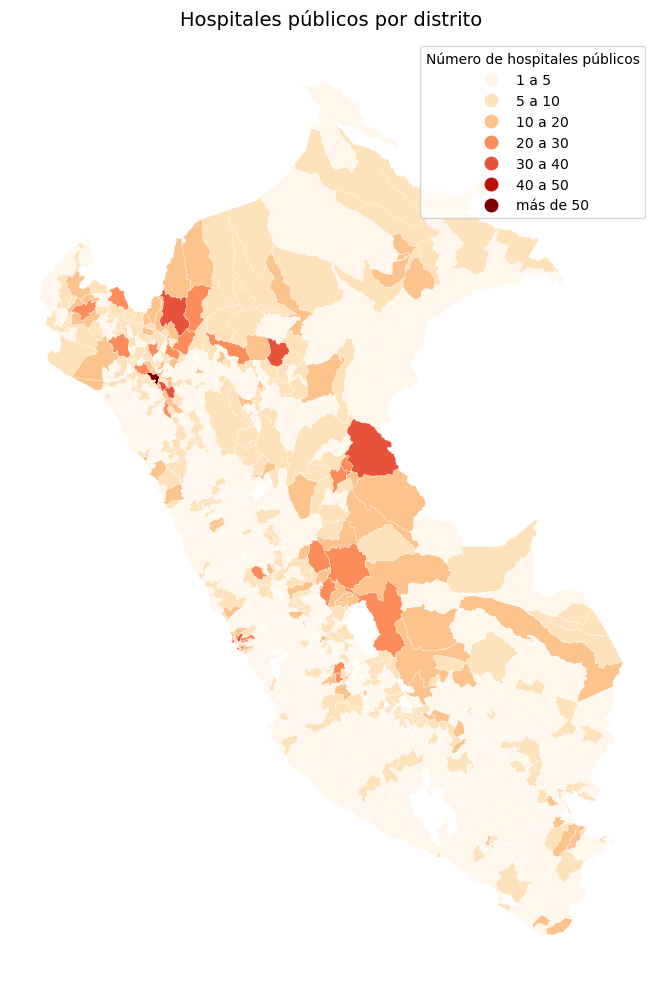

In [105]:
# 1) Definir bins como límites superiores
bins = [5, 10, 20, 30, 40, 50, mapa['Hosp_Publicos'].max()]

# 2) Poner a NaN los ceros para mostrarlos como "Sin datos"
mapa['Hosp_Publicos'] = mapa['Hosp_Publicos'].astype(int)
mapa.loc[mapa['Hosp_Publicos'] == 0, 'Hosp_Publicos'] = np.nan

# 3) Plot
fig, ax = plt.subplots(figsize=(9,10))
ax.set_axis_off()

mapa.plot(
    column='Hosp_Publicos',
    cmap='OrRd',
    scheme='UserDefined',                 # <-- como string
    classification_kwds={'bins': bins},   # límites superiores
    edgecolor='white', linewidth=0.2,
    legend=True, ax=ax,
    legend_kwds={
        "labels": ["1 a 5", "5 a 10", "10 a 20", "20 a 30", "30 a 40", "40 a 50", "más de 50"],
        "title": "Número de hospitales públicos"
    },
    missing_kwds={'color':'lightgrey','label':'Sin datos'}
)

ax.set_title('Hospitales públicos por distrito', fontsize=14, pad=10)
plt.tight_layout()
plt.show()


In [ ]:
# Verificando el número de hospitales públicos

hosp_pub = dataset_cv[dataset_cv['Institución'].isin(publicas)].copy()

# Agrupar por distrito y contar
tabla = (hosp_pub
         .groupby(['UBIGEO','Distrito'], as_index=False)
         .size()
         .rename(columns={'size':'Hosp_Publicos'}))

# Ordenar de mayor a menor
tabla = tabla.sort_values('Hosp_Publicos', ascending=False).reset_index(drop=True)

print(tabla.head(10))  # muestra los 10 distritos con más hospitales públicos



   UBIGEO                Distrito  Hosp_Publicos
0  060601                 CUTERVO             55
1  010205                   IMAZA             39
2  150132  SAN JUAN DE LURIGANCHO             36
3  060701              BAMBAMARCA             35
4  070101                  CALLAO             35
5  160201              YURIMAGUAS             34
6  060401                   CHOTA             32
7  250101                CALLERIA             31
8  010701            BAGUA GRANDE             30
9  200201                 AYABACA             30
